# 🧪 Step 1: CNN without Regularization (Baseline Model)

In this step, we build a **basic CNN** for CIFAR-10 **without Dropout or BatchNormalization**.  
👉  Purpose: To observe if the model **overfits** when no regularization is used.
### 🔑 Key Takeaways
- Without regularization, the CNN quickly overfits: train accuracy is high, but test accuracy lags behind.
- BatchNormalization stabilizes and speeds up training by normalizing activations inside the network.
- Dropout forces the network to not rely on specific neurons, which improves generalization.
- Even though training accuracy is slightly lower, the **test accuracy improves** — which is our real goal.


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training data:", x_train.shape, y_train.shape)
print("Test data:", x_test.shape, y_test.shape)


Training data: (50000, 32, 32, 3) (50000, 10)
Test data: (10000, 32, 32, 3) (10000, 10)


In [4]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training data:", x_train.shape, y_train.shape)
print("Test data:", x_test.shape, y_test.shape)


Training data: (50000, 32, 32, 3) (50000, 10)
Test data: (10000, 32, 32, 3) (10000, 10)


In [5]:

# Build CNN model (NO regularization)
model_no_reg = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


D:\miniconda_setup\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile model
model_no_reg.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Show model summary
model_no_reg.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,786 (1.04 MB)

 Trainable params: 271,786 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train model (10 epochs)
history_no_reg = model_no_reg.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 49s 65ms/step - accuracy: 0.4452 - loss: 1.5281 - val_accuracy: 0.5620 - val_loss: 1.2357
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.6004 - loss: 1.1211 - val_accuracy: 0.6482 - val_loss: 1.0229
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 44s 62ms/step - accuracy: 0.6699 - loss: 0.9398 - val_accuracy: 0.6922 - val_loss: 0.8991
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 44s 62ms/step - accuracy: 0.7109 - loss: 0.8268 - val_accuracy: 0.7000 - val_loss: 0.8717
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - accuracy: 0.7466 - loss: 0.7256 - val_accuracy: 0.7314 - val_loss: 0.7894
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 44s 62ms/step - accuracy: 0.7723 - loss: 0.6497 - val_accuracy: 0.7322 - val_loss: 0.7624
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 51s 72ms/step - accuracy: 0.7971 - loss: 0.5774 - val_accuracy: 0.7434 - val_loss: 0.7530
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 50s 71ms/step - accuracy: 0.8218 - loss: 0.5092 - 

In [8]:
# Evaluate on test data
test_loss, test_acc = model_no_reg.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy (No Regularization):", test_acc)

Test Accuracy (No Regularization): 0.7343999743461609


## 2 Regularization & Dropout – Fighting Overfitting

###  What is Overfitting?
- Overfitting happens when a model **memorizes training data** instead of learning general patterns.  
- The result is:
  - **High training accuracy**
  - **Low validation/test accuracy**
- In our previous experiment (CIFAR-10 CNN without regularization), we saw this problem:
  - Training Accuracy ~ 85%
  - Validation Accuracy ~ 75%
  - Test Accuracy ~ 73%
  - Gap between training and validation → **overfitting**

---

###  Regularization
Regularization refers to **techniques used to reduce overfitting** and make models generalize better.

Some common methods:
- **Dropout** → randomly drops neurons during training so the model cannot rely too much on specific connections.  
- **Weight Decay (L2 Regularization)** → penalizes very large weights in the network.  

We will mainly use **Dropout** here.

---

###  Batch Normalization
Batch Normalization (BatchNorm) normalizes activations of each layer so that:
- Training is more stable and faster  
- Helps prevent exploding/vanishing gradients  
- Acts as a regularizer (reduces overfitting slightly)  

---

###  Why Apply Dropout + BatchNorm?
- Our model without regularization **overfit** (good training accuracy, poor test accuracy).  
- By applying Dropout + BatchNorm:
  - We force the model to learn **robust features**, not memorize training data.  
  - We should see **less gap** between training and validation accuracy.  
  - Test accuracy should improve compared to the unregularized model.  

---

➡️ Next step: Train a **CNN with Dropout + BatchNorm** and compare results.


In [9]:
# Imports & helpers
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# For reproducibility (optional)
tf.random.set_seed(42)
np.random.seed(42)

In [11]:
# CIFAR-10 class names
CLASS_NAMES = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

def one_hot(y, num_classes=10):
    """Safely one-hot encode labels only if needed."""
    y = np.asarray(y).squeeze()
    return y if y.ndim == 2 and y.shape[1] == num_classes else to_categorical(y, num_classes)

In [12]:
# 1) Load & preprocess CIFAR-10 (fresh load to avoid old states)
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# One-hot encode (safely)
y_train = one_hot(y_train, 10)
y_test  = one_hot(y_test, 10)

print("Train:", x_train.shape, y_train.shape)
print("Test :", x_test.shape,  y_test.shape)


Train: (50000, 32, 32, 3) (50000, 10)
Test : (10000, 32, 32, 3) (10000, 10)


### Model: BatchNorm + Dropout
- **BatchNormalization** after conv blocks → stable & faster training  
- **Dropout** (0.25/0.5) → combats overfitting

In [13]:
# 2) Build the regularized CNN
model_reg = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Head
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model_reg.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_reg.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591,658 (2.26 MB)

 Trainable params: 591,466 (2.26 MB)

 Non-trainable params: 192 (768.00 B)

### Train
- `validation_split=0.1` to monitor generalization  
- `EarlyStopping` to stop when val loss stops improving  
- `restore_best_weights=True` to keep the best epoch

In [14]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr  = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

history_reg = model_reg.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 90s 121ms/step - accuracy: 0.1959 - loss: 2.0807 - val_accuracy: 0.3140 - val_loss: 1.7996 - learning_rate: 0.0010
Epoch 2/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 88s 125ms/step - accuracy: 0.2467 - loss: 1.8751 - val_accuracy: 0.3800 - val_loss: 1.6534 - learning_rate: 0.0010
Epoch 3/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 87s 124ms/step - accuracy: 0.3050 - loss: 1.7376 - val_accuracy: 0.4740 - val_loss: 1.4584 - learning_rate: 0.0010
Epoch 4/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 90s 128ms/step - accuracy: 0.3934 - loss: 1.5598 - val_accuracy: 0.5370 - val_loss: 1.3506 - learning_rate: 0.0010
Epoch 5/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 96s 137ms/step - accuracy: 0.4809 - loss: 1.3842 - val_accuracy: 0.6338 - val_loss: 1.0607 - learning_rate: 0.0010
Epoch 6/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 90s 128ms/step - accuracy: 0.5607 - loss: 1.2075 - val_accuracy: 0.6716 - val_loss: 0.9664 - learning_rate: 0.0010
Epoch 7/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 89s 126ms/step - accuracy: 0.6

In [15]:
#Evaluate on test set
test_loss, test_acc = model_reg.evaluate(x_test, y_test, verbose=0)
print(f"✅ Regularized Test Accuracy: {test_acc:.4f}  |  Test Loss: {test_loss:.4f}")


✅ Regularized Test Accuracy: 0.7777  |  Test Loss: 0.6758


### Plot Training Curves (compare Train vs Val to check overfitting)

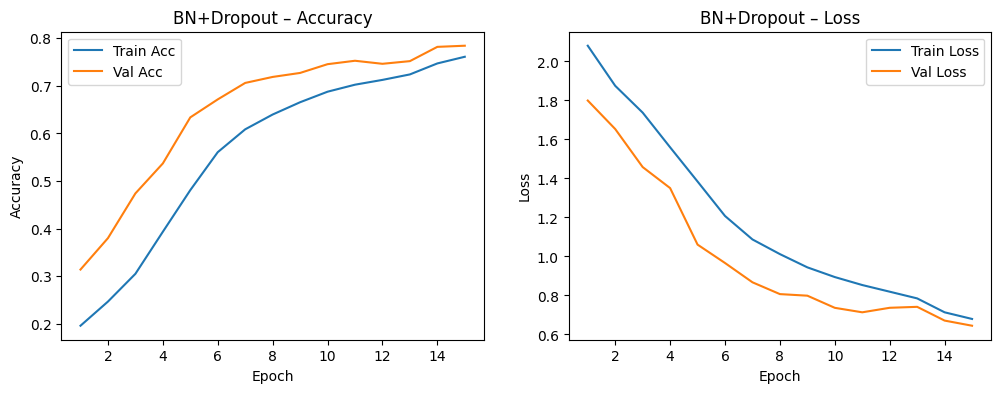

In [16]:
def plot_curves(history, title_prefix="Regularized"):
    h = history.history
    epochs = range(1, len(h['accuracy'])+1)

    plt.figure(figsize=(12,4))
    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(epochs, h['accuracy'], label='Train Acc')
    plt.plot(epochs, h['val_accuracy'], label='Val Acc')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title(f'{title_prefix} – Accuracy'); plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(epochs, h['loss'], label='Train Loss')
    plt.plot(epochs, h['val_loss'], label='Val Loss')
    plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title(f'{title_prefix} – Loss'); plt.legend()

    plt.show()

plot_curves(history_reg, "BN+Dropout")


### Quick Prediction Visuals
Check a few test images with predicted vs true labels.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


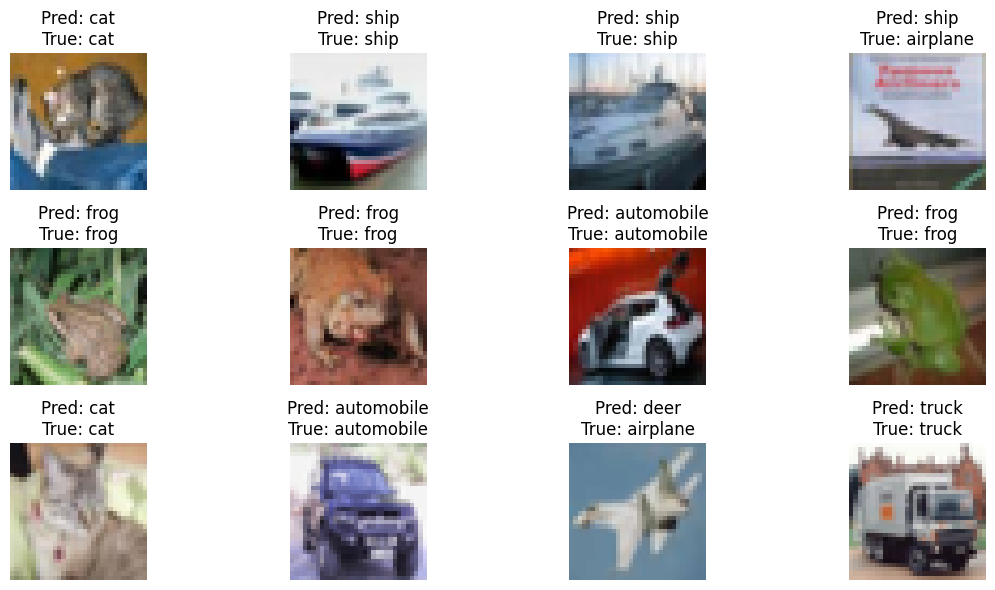

In [17]:
# Predict a small batch
probs = model_reg.predict(x_test[:20])
preds = probs.argmax(axis=1)
true  = y_test[:20].argmax(axis=1)

plt.figure(figsize=(12,6))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {CLASS_NAMES[preds[i]]}\nTrue: {CLASS_NAMES[true[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


### (Optional) Compare with Baseline
If you trained the **baseline (no regularization)** as `history_no_reg`, this cell will plot both.

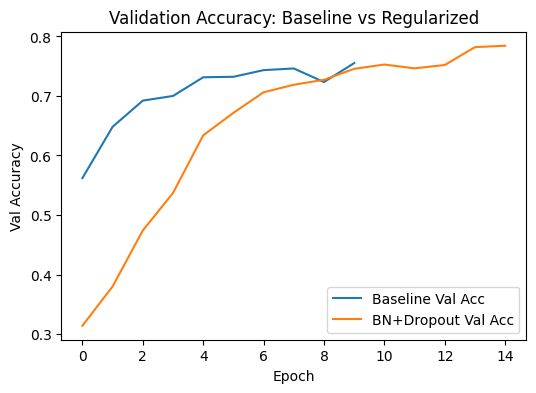

In [19]:
if 'history_no_reg' in globals():
    # Plot validation accuracy comparison
    plt.figure(figsize=(6,4))
    plt.plot(history_no_reg.history['val_accuracy'], label='Baseline Val Acc')
    plt.plot(history_reg.history['val_accuracy'], label='BN+Dropout Val Acc')
    plt.xlabel('Epoch'); plt.ylabel('Val Accuracy'); plt.title('Validation Accuracy: Baseline vs Regularized'); plt.legend()
    plt.show()
